# **Fundamental Analysis of stocks using OpenBB Historical Data**

### **Description**
This analysis examines the gap between the opening price of Apple (AAPL) and the previous day's closing price, utilizing OpenBB's historical data. By calculating the gap, this study aims to identify significant price movements that may indicate market sentiment or reactions to news and events. The visualization provides insights into trading patterns, helping investors and analysts understand how the market perceives Apple’s stock performance over time. This analysis serves as a valuable tool for evaluating potential trading opportunities based on historical price behavior.

---


### Author
[![Author Profile](https://img.shields.io/badge/Manish-k723-Color?style=flat&logo=github)](https://github.com/Manish-k723)


[![Open currencyExchangeRateForecasting.ipynb with Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1L5W1GVkqMXbsY7jUfW6q9RSP0V4_DdCe?usp=sharing)

If you are running this notebook in Colab, you can run the following command to install the OpenBB Platform:

```python
!pip install openbb
```

In [76]:
!pip install openbb -q
!pip install mplfinance -q

In [77]:
from openbb import obb
import mplfinance as mpf

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random
import math
import warnings
warnings.filterwarnings("ignore")

palette_color = sns.color_palette('dark')
palette1 = ['dimgrey','crimson']
palette2 = ['crimson', 'dimgrey']
palette3 = ['darkgreen', 'orange']
palette4= ['salmon','mediumseagreen']

# **Importing Data**
This cell fetches historical stock rate data for the Applle stocks using  yfinance provider, choose the provider accordingly.

Symbols of few more giants:
- Microsoft:	MSFT
- Alphabet (Google):	GOOG
- Amazon:	AMZN
- Nvidia:	NVDA

Pls refer this website: https://finance.yahoo.com/ for more other stocks.



In [78]:
symbol = 'AAPL'

try:
    df = obb.equity.price.historical(symbol=symbol, start_date='1991-01-01', provider="yfinance").to_df()
    df['Symbol'] = symbol
    df = df.reset_index()
except Exception as e:
    print(f"Failed to fetch data for {symbol}: {str(e)}")

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()

,date,open,high,low,close,volume,split_ratio,dividend,Symbol
0,1991-01-02,0.381696,0.392857,0.375000,0.388393,154985600,0.0,0.0,AAPL
1,1991-01-03,0.388393,0.395089,0.383929,0.383929,150180800,0.0,0.0,AAPL
2,1991-01-04,0.383929,0.395089,0.383929,0.386161,141523200,0.0,0.0,AAPL
3,1991-01-07,0.383929,0.404018,0.383929,0.386161,310800000,0.0,0.0,AAPL
4,1991-01-08,0.390625,0.391741,0.379464,0.386161,218691200,0.0,0.0,AAPL


## **Basic Data Validation**

In [79]:
print(f'Total null values across columns are: {df.isna().sum().sum()}')
print(f'Number of duplicate rows in data: {df.duplicated().sum()}')

Total null values across columns are: 0
Number of duplicate rows in data: 0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8514 entries, 0 to 8513
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         8514 non-null   datetime64[ns]
 1   open         8514 non-null   float64       
 2   high         8514 non-null   float64       
 3   low          8514 non-null   float64       
 4   close        8514 non-null   float64       
 5   volume       8514 non-null   int64         
 6   split_ratio  8514 non-null   float64       
 7   dividend     8514 non-null   float64       
 8   Symbol       8514 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 598.8+ KB


In [81]:
df.describe()

,date,open,high,low,close,volume,split_ratio,dividend
count,8514,8514.000000,8514.000000,8514.000000,8514.000000,8.514000e+03,8514.000000,8514.00000
mean,2007-11-20 15:35:38.689218048,30.239434,30.562918,29.928274,30.259437,3.627695e+08,0.001762,0.00100
min,1991-01-02 00:00:00,0.114955,0.118304,0.113839,0.115513,2.396800e+06,0.000000,0.00000
25%,1999-06-04 18:00:00,0.397902,0.406250,0.390625,0.398438,1.271356e+08,0.000000,0.00000
50%,2007-11-19 12:00:00,3.998572,4.075714,3.920535,3.982500,2.449664e+08,0.000000,0.00000
75%,2016-05-04 18:00:00,29.201875,29.438750,29.006250,29.191875,4.602899e+08,0.000000,0.00000
max,2024-10-18 00:00:00,236.479996,237.490005,234.009995,235.000000,7.421641e+09,7.000000,0.25000
std,NaN,52.889947,53.450137,52.362607,52.933572,3.620184e+08,0.092585,0.01362


In [82]:
print(f"Data starts from: {df['date'].min()}")
print(f"Data ends at: {df['date'].max()}")
duplicate_dates = df[df.duplicated(subset=['date'], keep=False)]
print(f"Number of rows with duplicated dates: {len(duplicate_dates)}")

Data starts from: 1991-01-02 00:00:00
Data ends at: 2024-10-18 00:00:00
Number of rows with duplicated dates: 0


In [83]:
negative_prices = df[df['close'] <= 0]
print(f"Number of rows with negative or zero close prices: {len(negative_prices)}")

Number of rows with negative or zero close prices: 0


# **Fundamental Analysis**

## **Graph: Close Price Over Time**

This graph plots the close price of the stock over time, reflecting the price at which the stock closed each trading day.

Importance for Investors:

- Trend Identification: Investors can identify long-term trends in the stock's performance, helping them gauge the company's financial health.
- Entry/Exit Points: By observing price patterns, investors can make informed decisions about when to buy or sell the stock.

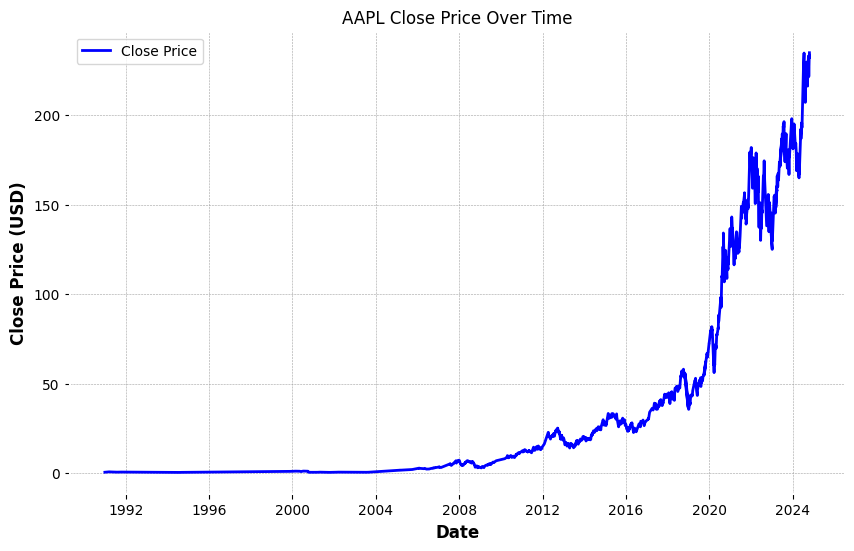

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')

# Add titles and labels
plt.title(f'{symbol} Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

Interpretation:
- Upward Trends: A consistent upward trend in adjusted close price indicates strong investor confidence and good financial performance.
- Downward Trends: A drop in the adjusted close price might signal underlying issues within the company or the broader market.
- Volatility: Sharp fluctuations can reflect high volatility, which could be both a risk and an opportunity depending on the investor’s strategy.

## **Graph: Candlestick Chart**

This graph displays the candlestick chart for the stock, showing the stock's price movement over time.

Importance for Investors:

- Price Action: Candlesticks provide insights into price movements and market sentiment over a specific period.
- Trend Identification: The chart helps identify potential trends, reversals, and patterns.

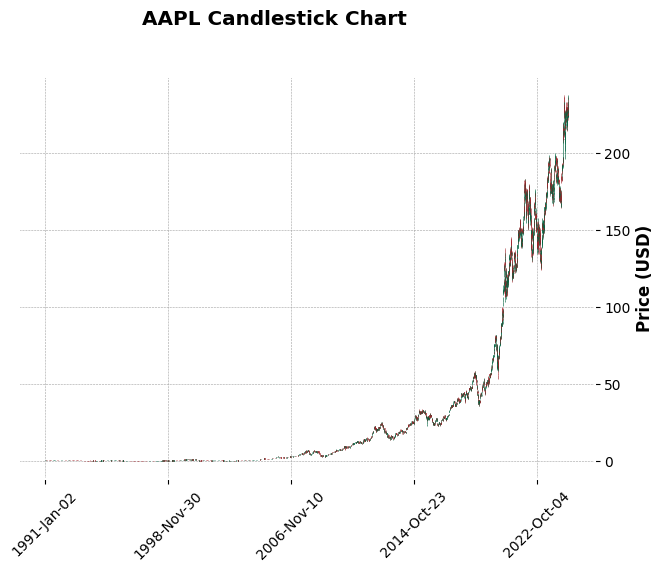

In [98]:
temp_df = df.copy()
temp_df.set_index('date', inplace=True)
mpf.plot(temp_df, type='candle', style='charles', volume=False, title=f'{symbol} Candlestick Chart', ylabel='Price (USD)')

Interpretation:
- Bullish Candles: A candle with a body that closes above the open suggests buying pressure and potential upward movement.
- Bearish Candles: A candle that closes below the open indicates selling pressure and potential downward movement.

## **Return on Investmment**
It measures the profitability of an investment relative to its cost, enabling them to assess the effectiveness of their investments and make informed financial decisions.

Steps to Calculate ROI
- Choose the Time Period: Decide the time period over which you want to calculate the ROI (e.g., 1 month, 1 year).
- Extract Prices: Get the initial and final closing prices for that period.
- Calculate ROI: Use the formula above to calculate ROI.

`roi = (final_price - initial_price)*100/initial_price`

In [86]:
start_date = df.date.min()  # Replace with your desired start date
end_date = df.date.max()    # Replace with your desired end date

# Filter DataFrame for the specific time period
roi_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Get Initial and Final Prices
initial_price = roi_df['close'].iloc[0]  # First closing price in the period
final_price = roi_df['close'].iloc[-1]    # Last closing price in the period

# Calculate ROI
roi = ((final_price - initial_price) / initial_price) * 100

print(f'ROI over the selected period: {roi:.2f}%')

ROI over the selected period: 60405.72%


## **Graph: Volume of Shares Traded Over Time**

This graph shows the trading volume of stock over time, indicating how many shares were traded each day.

Importance for Investors:

- Market Interest: High volume signals strong interest, often indicating potential price movements.
- Liquidity: Higher volume enhances liquidity, facilitating easier buying and selling of shares.

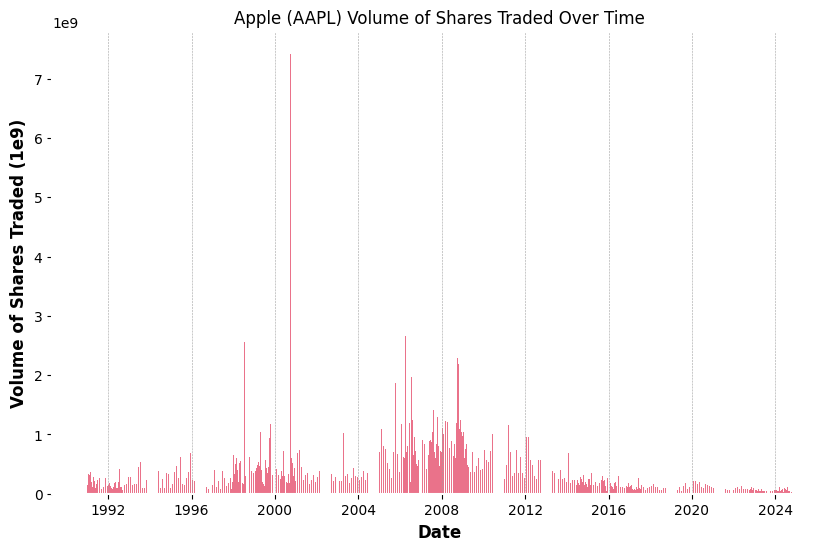

In [87]:
# Plot Volume of Shares Traded Over Time
plt.figure(figsize=(10, 6))
plt.bar(df['date'], df['volume'], color='crimson', alpha=0.6)

# Add titles and labels
plt.title(f'{symbol} Volume of Shares Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume of Shares Traded (1e9)')
plt.grid(axis='y')
plt.show()

Interpretation:
- Spike in Volume: Indicates potential price movement; significant spikes can signal important market events.
- Low Volume: Suggests lack of interest, which may lead to stagnant price behavior.

## **Graph: Moving Averages (50-Day and 200-Day)**

This graph plots the 50-day and 200-day moving averages of the stock prices, smoothing out price fluctuations to identify trends.

Importance for Investors:

- Trend Analysis: Moving averages help identify long-term trends by filtering out short-term volatility.
- Buy/Sell Signals: Crossovers (e.g., when the 50-day moving average crosses above the 200-day) can signal potential buy or sell opportunities.


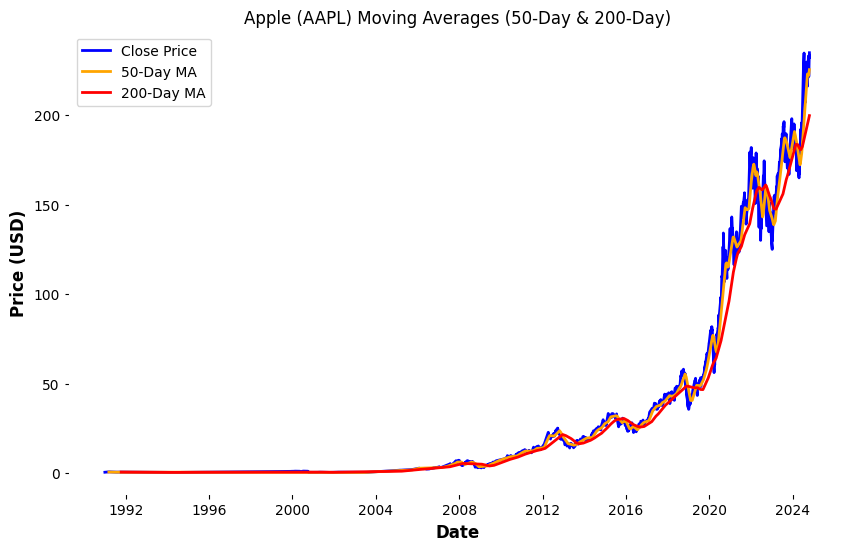

In [88]:
# Calculate moving averages
df['50-Day MA'] = df['close'].rolling(window=50).mean()
df['200-Day MA'] = df['close'].rolling(window=200).mean()

# Plot Moving Averages
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.plot(df['date'], df['50-Day MA'], label='50-Day MA', color='orange')
plt.plot(df['date'], df['200-Day MA'], label='200-Day MA', color='red')

# Add titles and labels
plt.title(f'{symbol} Moving Averages (50-Day & 200-Day)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()

# Show the plot
plt.show()

Interpretation:
- Trend Confirmation: When the short-term MA is above the long-term MA, it indicates an uptrend; the opposite suggests a downtrend.
- Crossover Signals: A crossover can indicate potential buying or selling opportunities, guiding investment decisions.


## **Graph: Relative Strength Index (RSI)**
This graph displays the Relative Strength Index (RSI) for Apple (AAPL), indicating the stock's momentum over time.

Importance for Investors:

- Overbought/Oversold Levels: RSI values above 70 typically indicate that a stock is overbought, while values below 30 suggest it may be oversold.
- Trend Reversal Signals: RSI can help identify potential trend reversals when the stock moves back into the neutral range.

In [ ]:
#helper function for calculating rsi numbers
def calculate_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

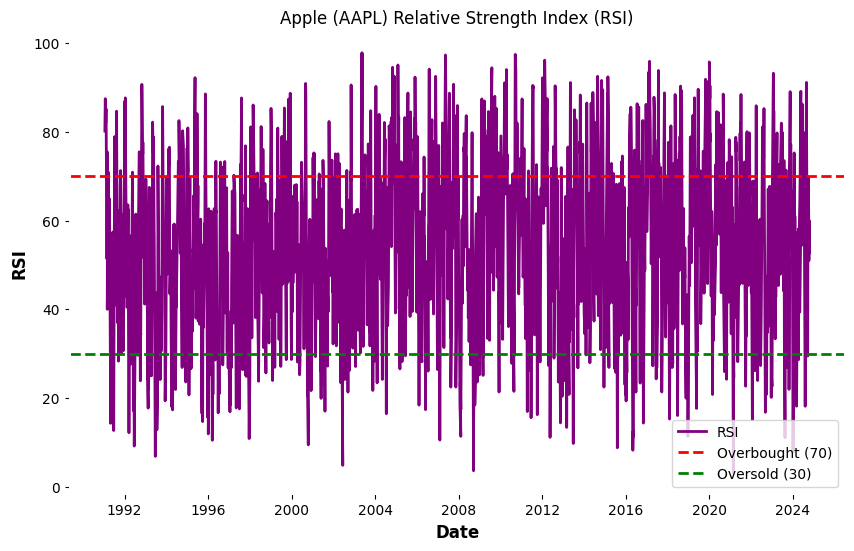

In [89]:
# Calculate RSI
df['RSI'] = calculate_rsi(df)

# Plot RSI
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['RSI'], color='purple', label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

# Add titles and labels
plt.title(f'{symbol} Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()


Interpretation:
- Overbought Conditions: An RSI above 70 may indicate that the stock is overbought, suggesting a potential price correction.
- Oversold Conditions: An RSI below 30 may indicate that the stock is oversold, signaling a potential buying opportunity.

## **Graph: Bollinger Bands**

This graph displays the Bollinger Bands for the stock, consisting of a middle band (simple moving average) and two outer bands (standard deviations above and below the moving average).

Importance for Investors:

- Volatility Measurement: The distance between the bands indicates market volatility. Wider bands suggest higher volatility, while narrower bands indicate lower volatility.
- Overbought/Oversold Signals: Price touching the upper band may suggest overbought conditions, while touching the lower band may indicate oversold conditions.

In [90]:
#helper function for calculating bollinger bands
def calculate_bollinger_bands(data, window=20, num_sd=2):
    middle_band = data['close'].rolling(window=window).mean()
    std_dev = data['close'].rolling(window=window).std()
    upper_band = middle_band + (std_dev * num_sd)
    lower_band = middle_band - (std_dev * num_sd)
    return middle_band, upper_band, lower_band

In [99]:
# Calculate Bollinger Bands
df['Middle Band'], df['Upper Band'], df['Lower Band'] = calculate_bollinger_bands(df)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['close'], mode='lines', name='Close Price', line=dict(color='blue')))

# Add the Bollinger Bands
fig.add_trace(go.Scatter(x=df['date'], y=df['Middle Band'], mode='lines', name='Middle Band (SMA)', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=df['date'], y=df['Upper Band'], mode='lines', name='Upper Band', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df['date'], y=df['Lower Band'], mode='lines', name='Lower Band', line=dict(color='red')))

# Update layout
fig.update_layout(
    title=f'{symbol} Bollinger Bands',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    legend_title='Legend',
    template='plotly_white'
)
fig.show()

Interpretation:
- Price Movement: Prices touching the upper band suggest potential overbought conditions; touching the lower band suggests oversold conditions.
- Volatility Changes: When the bands widen, it indicates increased volatility, while narrowing bands suggest decreased volatility.

## **Graph: Dividend Yield**
This graph displays the Dividend Yield for the stock over time, calculated as the dividend per share divided by the closing price.

Importance for Investors:

- Income Generation: A higher dividend yield can be attractive for income-focused investors looking for regular cash flow.
- Valuation Insight: Changes in dividend yield can indicate how the market values the stock and its dividend payments.

In [92]:
# Calculate Dividend Yield
df['Dividend_Yield'] = df['dividend'] / df['close']

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['Dividend_Yield'], mode='lines+markers', name='Dividend Yield', line=dict(color='green')))
fig.update_layout(
    title=f'{symbol} Dividend Yield',
    xaxis_title='Date',
    yaxis_title='Dividend Yield',
    template='plotly_white'
)
fig.show()

Interpretation
- This graph will show how the dividend yield has changed over time, providing insights into the stock's income potential.

## **Graph: Stock Price Adjusted for Splits**
This graph displays the adjusted stock price for the stock based on the split ratio over time. Adjusting for stock splits provides a clearer picture of the stock's performance without the distortions caused by splits.

Importance for Investors:

- True Performance: It allows investors to see the true price performance over time, excluding the effects of stock splits.
- Accessibility: Stock splits can make shares more affordable for retail investors, potentially increasing demand.

In [93]:
# Calculate Adjusted Close Price based on Split Ratio
df['Adjusted_Close'] = df['close'] * df['split_ratio']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['Adjusted_Close'], mode='lines+markers', name='Adjusted Close Price', line=dict(color='purple')))

# Update layout
fig.update_layout(
    title=f'{symbol} Adjusted Stock Price (Adjusted for Splits)',
    xaxis_title='Date',
    yaxis_title='Adjusted Price (USD)',
    template='plotly_white'
)

# Show the figure
fig.show()


Interpretation:
- This chart will show how the stock price has evolved over time when adjusted for stock splits, giving you better insights into its true performance.

## **Graph Name: Price-to-Dividend Ratio Over Time**
This graph illustrates the Price-to-Dividend Ratio for the stock, highlighting how much investors pay for each dollar of dividends over time.

Importance for Investors:

- Yield Insight: Indicates the valuation of the stock relative to its dividends.
- Investment Decision: Helps assess whether the stock is overpriced or fairly valued based on dividend payouts.

In [94]:
fig = go.Figure()
df['Price_to_Dividend_Ratio'] = df['close'] / df['dividend']
fig.add_trace(go.Scatter(x=df['date'], y=df['Price_to_Dividend_Ratio'], mode='lines+markers', name='Price-to-Dividend Ratio', line=dict(color='orange')))

fig.update_layout(
    title='Price-to-Dividend Ratio Over Time',
    xaxis_title='Date',
    yaxis_title='Price-to-Dividend Ratio',
    template='plotly_white'
)
fig.show()

Interpretation: A higher Price-to-Dividend Ratio may suggest the stock is overvalued, while a lower ratio could indicate better value for dividend-seeking investors.



```
Final Fun thing: What if we would have invested 1$ in our selected stock on the day from which we are doing our analysis.
```



In [95]:
# Find the closing price on the day when we have decided to invest $1
initial_date_price = df[df['date'] == df.date.min()]['close'].values[0]
most_recent_price = df['close'].iloc[-1] # the most recent close price as per our data
initial_investment = 1  # $1
future_value = initial_investment * (most_recent_price / initial_date_price)
print(f"Future value of a $1 investment on {df.date.min()}: ${future_value:.2f}")

Future value of a $1 investment on 1991-01-02 00:00:00: $605.06


###### **I wish, I would have invested only $1000 in APPLE stocks on that day, I must be an millionare by today 😂🥲**

In [96]:
df.head()

,date,open,high,low,close,volume,split_ratio,dividend,Symbol,50-Day MA,200-Day MA,RSI,Middle Band,Upper Band,Lower Band,Dividend_Yield,Adjusted_Close,Price_to_Dividend_Ratio
0,1991-01-02,0.381696,0.392857,0.375000,0.388393,154985600,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,inf
1,1991-01-03,0.388393,0.395089,0.383929,0.383929,150180800,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,inf
2,1991-01-04,0.383929,0.395089,0.383929,0.386161,141523200,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,inf
3,1991-01-07,0.383929,0.404018,0.383929,0.386161,310800000,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,inf
4,1991-01-08,0.390625,0.391741,0.379464,0.386161,218691200,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,inf


In [101]:
df.describe()

,date,open,high,low,close,volume,split_ratio,dividend,50-Day MA,200-Day MA,RSI,Middle Band,Upper Band,Lower Band,Dividend_Yield,Adjusted_Close,Price_to_Dividend_Ratio
count,8514,8514.000000,8514.000000,8514.000000,8514.000000,8.514000e+03,8514.000000,8514.00000,8465.000000,8315.000000,8501.000000,8495.000000,8495.000000,8495.000000,8514.000000,8514.000000,8514.000000
mean,2007-11-20 15:35:38.689218048,30.239434,30.562918,29.928274,30.259437,3.627695e+08,0.001762,0.00100,29.776513,28.457898,53.808976,30.069779,31.866916,28.272641,0.000026,0.080494,inf
min,1991-01-02 00:00:00,0.114955,0.118304,0.113839,0.115513,2.396800e+06,0.000000,0.00000,0.141378,0.162875,3.142791,0.126451,0.144132,0.027254,0.000000,0.000000,149.760058
25%,1999-06-04 18:00:00,0.397902,0.406250,0.390625,0.398438,1.271356e+08,0.000000,0.00000,0.400246,0.381012,40.964212,0.398563,0.434007,0.358563,0.000000,0.000000,NaN
50%,2007-11-19 12:00:00,3.998572,4.075714,3.920535,3.982500,2.449664e+08,0.000000,0.00000,4.032493,4.286527,53.846506,4.021036,4.500254,3.490854,0.000000,0.000000,NaN
75%,2016-05-04 18:00:00,29.201875,29.438750,29.006250,29.191875,4.602899e+08,0.000000,0.00000,28.818700,28.868300,67.086413,28.960250,30.412901,27.607815,0.000000,0.000000,NaN
max,2024-10-18 00:00:00,236.479996,237.490005,234.009995,235.000000,7.421641e+09,7.000000,0.25000,225.529600,199.829250,97.864628,228.582500,240.300219,222.444956,0.006677,516.159973,inf
std,NaN,52.889947,53.450137,52.362607,52.933572,3.620184e+08,0.092585,0.01362,51.909391,49.312422,17.534810,52.528504,55.569034,49.529623,0.000322,5.869363,NaN


# **Conclusion**
The dataset has evolved from 6 data points to include a wide range of important columns, expanding the potential for deeper analysis. With data on open, high, low, close, volume, and key indicators like the 50-Day MA, 200-Day MA, RSI, and Bollinger Bands, this dataset now offers even more opportunities for both fundamental and technical analysis. Additional metrics like dividend, split_ratio, and Dividend_Yield provide valuable insights into stock performance and shareholder returns.

This broader set of data encourages further exploration and analysis, helping you to make more informed decisions.






